<a href="https://colab.research.google.com/github/bpriantti/projeto_dl_regressor_time_series_volatilidade_em_15_dias_PETR4/blob/main/10_Projeto_DL_Regressor_Time_Series_Volatilidade_PETR4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto DL regressor - volatilidade em 15 dias - PETR4

__Autor:__  
   - Bruno Priantti.
    
__Contato:__  
  - b.priantti@outlook.com

__Encontre-me:__  
   -  https://www.linkedin.com/in/bpriantti/  
   -  https://github.com/bpriantti
   -  https://www.instagram.com/brunopriantti/
   


# Python Codes:
___

# install non-native libs:

In [ ]:
!pip install -q yfinance
!pip install -q talib-binary

     |████████████████████████████████| 62 kB 1.4 MB/s 
     |████████████████████████████████| 2.4 MB 27.2 MB/s 


#import libs:

In [ ]:
#import libs:
import pandas as pd
import numpy as np

#libs para visualization dos dados:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as md
import plotly.express as px
import plotly.graph_objects as Dash
import plotly.graph_objects as go

#lib para api com ativos da bolsa:
import yfinance as yf

#---:
import math
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler

#---:
import warnings
warnings.filterwarnings("ignore")

#download base de dados:
ticker = "PETR4.SA"

#datas - atentar para inicio em janeiro do ano de inicio do ativo ou proximo.
start =  "2011-01-01" 
end =    "2021-12-31"

#API - yahoo finance:
data = yf.download(ticker, start, end)


[*********************100%***********************]  1 of 1 completed


In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=data.index, y=data['Adj Close']))

fig.update_layout(height=500, width=1000,
                 title_text="Adj Close - PETR4:",
                 yaxis_title="Adj Close Prices")
fig.show()

In [ ]:
# calc returns:
data['log_returns'] = np.log(data.Close/data.Close.shift(1))

#---:
data['vol_15'] = data['log_returns'].rolling(16).std()

#---:
data = data[['log_returns','vol_15']].copy()
data.dropna(inplace = True)

#data split:
step_1 = data.loc['2011':'2017']
step_2 = data.loc['2012':'2018']
step_3 = data.loc['2013':'2019']
step_4 = data.loc['2014':'2020']

In [ ]:
#train-test split:
data_train = step_4.loc['2014':'2019']
data_test  = step_4.loc['2020']

In [ ]:
#---:
#normalizacao dos dados para compatilibilidade com o framework tensorflow
trainingd = data_train['vol_15'].values.reshape(-1,1)
testingd = data_test['vol_15'].values.reshape(-1,1)

#---:
#padronizacao dos dados, para compatibilidade com o framework tensorflow
sc = MinMaxScaler()
training_set_scaled = sc.fit_transform(trainingd)

#---:
#processo de vetorizacao dos dados:
x_train = []
y_train = []

#---:
#set windown size em 45 janelas:
timestamp = 45
length = len(trainingd)

for i in range(timestamp, length):
    x_train.append(training_set_scaled[i-timestamp:i, 0])
    y_train.append(training_set_scaled[i, 0])

#---:
x_train = np.array(x_train)
y_train = np.array(y_train)

#---:
#compatibilidade para input do modelo:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

#---:
#input sistema de redes neurais recorrentes - LSTM
model = Sequential() 

model.add(LSTM(units = 120, return_sequences = True, input_shape = (x_train.shape[1], 1))) 
model.add(Dropout(0.2))
model.add(LSTM(units = 120, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 120, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 120, return_sequences = False)) 
model.add(Dropout(0.2))
model.add(Dense(units = 1)) 
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

#treinando o modelo:
model.fit(x_train, y_train, epochs = 30, batch_size = 32)

#---:
#aplicando o modelo treinado para base de dados desconhecidos, teste.
test_set_scaled = sc.transform(testingd)

#---:
x_test = []
y_test = []

#---:
timestamp = 45
length = len(testingd)

#---:
for i in range(timestamp, length):
    x_test.append(test_set_scaled[i-timestamp:i, 0])
    y_test.append(test_set_scaled[i, 0])

#---:
x_test = np.array(x_test)
y_test = np.array(y_test)

#---:
#realizando predict do modelo:
y_pred = model.predict(x_test)

#---:
#armazenando dados em dataframe:
y_pred = pd.DataFrame(y_pred)
y_test = pd.DataFrame(y_test.reshape(-1,1))

y_pred.columns = ['sinal']
y_test.columns = ['sinal']


Epoch 1/30
46/46 [==============================] - 18s 192ms/step - loss: 0.0290
Epoch 2/30
46/46 [==============================] - 9s 194ms/step - loss: 0.0133
Epoch 3/30
46/46 [==============================] - 9s 194ms/step - loss: 0.0083
Epoch 4/30
46/46 [==============================] - 9s 194ms/step - loss: 0.0070
Epoch 5/30
46/46 [==============================] - 9s 195ms/step - loss: 0.0060
Epoch 6/30
46/46 [==============================] - 9s 194ms/step - loss: 0.0055
Epoch 7/30
46/46 [==============================] - 9s 193ms/step - loss: 0.0054
Epoch 8/30
46/46 [==============================] - 9s 192ms/step - loss: 0.0051
Epoch 9/30
46/46 [==============================] - 9s 192ms/step - loss: 0.0051
Epoch 10/30
46/46 [==============================] - 9s 192ms/step - loss: 0.0045
Epoch 11/30
46/46 [==============================] - 9s 193ms/step - loss: 0.0042
Epoch 12/30
46/46 [==============================] - 9s 194ms/step - loss: 0.0039
Epoch 13/30
46/46 [=====

In [ ]:
#---:
#avaliando o modelo e metricas:
import statsmodels.api as sm
from sklearn import metrics

MAE_test_sm = sm.tools.eval_measures.meanabs(y_test['sinal'], y_pred['sinal']) 
RMSE_test_sm = sm.tools.eval_measures.rmse(y_test['sinal'], y_pred['sinal'])

MAE = round(MAE_test_sm, 3)
RMSE = round(RMSE_test_sm, 3)
VOL_BASE = round(y_test['sinal'].mean(),3)
RATIO_MAE = round(metrics.mean_absolute_error(y_test['sinal'], y_pred['sinal'])/y_test['sinal'].mean()*100, 2)

eval = [MAE,RMSE,VOL_BASE,RATIO_MAE]

print("")
print("----- Avaliação do teste -----")
print('MAE:  ', MAE)
print('RMSE: ', RMSE )
print("")
print("A volatilidade média da base é: ")
print(VOL_BASE)
print()
print("O percentual do MAE em relaçao à média da base: ")
print(RATIO_MAE)


----- Avaliação do teste -----
MAE:   0.039
RMSE:  0.074

A volatilidade média da base é: 
0.398

O percentual do MAE em relaçao à média da base: 
9.86


In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(name="pred", y=y_pred['sinal'],mode='lines+markers'))
fig.add_trace(go.Scatter(name="real", y=y_test['sinal'],mode='lines+markers'))
fig.update_layout(height=500, width=1000,
                  title=dict(text="Volatility Forecasting: "))
fig.show()

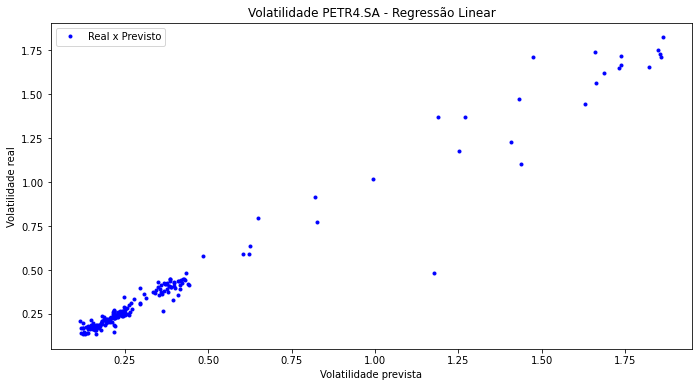

In [ ]:
# Gráfico dos resultados:
plt.figure(figsize = (11.5, 6))
plt.plot(y_test['sinal'], y_pred['sinal'], ".", color = "blue", label = "Real x Previsto")
plt.legend()
plt.xlabel("Volatilidade prevista")
plt.ylabel("Volatilidade real")
plt.title("Volatilidade " + ticker + " - Regressão Linear");

In [ ]:
y_test['pred'] = y_pred['sinal']
y_test.columns = ['step4_sinal','step4_pred']

In [ ]:
#pred = []
pred.append([y_test,eval])

In [ ]:
pred[0]

[     step1_sinal  step1_pred
 0       0.217454    0.225883
 1       0.209992    0.230689
 2       0.211440    0.230651
 3       0.267401    0.230178
 4       0.323223    0.257618
 ..           ...         ...
 204     0.157374    0.181061
 205     0.159655    0.183539
 206     0.153608    0.184000
 207     0.149350    0.181389
 208     0.135357    0.177058
 
 [209 rows x 2 columns], [0.029, 0.052, 0.264, 11.11]]

In [ ]:
import pickle

with open("lstm_vol.txt", "wb") as fp:
   pickle.dump(pred, fp)

with open("lstm_vol.txt", "rb") as fp:
  b = pickle.load(fp)

In [ ]:
b

[[     step1_sinal  step1_pred
  0       0.217454    0.225883
  1       0.209992    0.230689
  2       0.211440    0.230651
  3       0.267401    0.230178
  4       0.323223    0.257618
  ..           ...         ...
  204     0.157374    0.181061
  205     0.159655    0.183539
  206     0.153608    0.184000
  207     0.149350    0.181389
  208     0.135357    0.177058
  
  [209 rows x 2 columns], [0.029, 0.052, 0.264, 11.11]],
 [     step2_sinal  step2_pred
  0       0.127353    0.133497
  1       0.144797    0.129529
  2       0.147067    0.140077
  3       0.137443    0.148591
  4       0.132845    0.145192
  ..           ...         ...
  196     0.223111    0.227048
  197     0.227087    0.216774
  198     0.222103    0.221814
  199     0.202843    0.222550
  200     0.269143    0.209339
  
  [201 rows x 2 columns], [0.033, 0.054, 0.372, 8.94]],
 [     step3_sinal  step3_pred
  0       0.121109    0.091035
  1       0.096852    0.098491
  2       0.106997    0.097448
  3       0.1

In [ ]:
#programa para ler os dados e concatenar os aquivos!